# Assignment: Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not

## Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#we have 1460 rows and 81 columns
housing.shape

(1460, 81)

In [4]:
#Summary
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning 

In [6]:
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageType       0.06
GarageCond       0.06
GarageYrBlt      0.06
GarageFinish     0.06
GarageQual       0.06
BsmtFinType1     0.03
BsmtExposure     0.03
BsmtCond         0.03
BsmtQual         0.03
BsmtFinType2     0.03
MasVnrArea       0.01
MasVnrType       0.01
Exterior2nd      0.00
Exterior1st      0.00
OverallCond      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
SalePrice        0.00
OverallQual      0.00
                 ... 
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
3SsnPorch        0.00
TotRmsAbvGrd     0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
Functional       0.00
KitchenQual      0.00
BsmtUnfSF        0.00
2ndFlrSF  

In [7]:
# Drop the columns which have more than 30% null values


round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/len(housing.index),2).values>0.10]


LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [8]:

housing = housing.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')


In [9]:
#again check the null percentage
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False)

GarageType       0.06
GarageYrBlt      0.06
GarageCond       0.06
GarageQual       0.06
GarageFinish     0.06
BsmtFinType1     0.03
BsmtExposure     0.03
BsmtCond         0.03
BsmtQual         0.03
BsmtFinType2     0.03
MasVnrArea       0.01
MasVnrType       0.01
SalePrice        0.00
RoofMatl         0.00
RoofStyle        0.00
Exterior2nd      0.00
Exterior1st      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
BldgType         0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle       0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
                 ... 
GarageCars       0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
EnclosedPorch    0.00
BsmtUnfSF        0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
YrSold           0.00
SaleType         0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbv

In [10]:
#converting year to number of years
housing['YearBuilt'] = 2019 - housing['YearBuilt']
housing['YearRemodAdd'] = 2019 - housing['YearRemodAdd']
housing['GarageYrBlt'] = 2019 - housing['GarageYrBlt']
housing['YrSold'] = 2019 - housing['YrSold']

In [11]:
#checking unique values in following columns 
print(housing['GarageType'].value_counts())
print(housing['GarageYrBlt'].value_counts())
print(housing['GarageCond'].value_counts())
print(housing['GarageQual'].value_counts())
print(housing['GarageFinish'].value_counts())
print(housing['BsmtFinType1'].value_counts())
print(housing['BsmtExposure'].value_counts())
print(housing['BsmtCond'].value_counts())
print(housing['BsmtQual'].value_counts())
print(housing['BsmtFinType2'].value_counts())
print(housing['MasVnrArea'].value_counts())
print(housing['MasVnrType'].value_counts())


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
14.0     65
13.0     59
15.0     53
16.0     50
12.0     49
42.0     35
21.0     31
20.0     30
11.0     29
43.0     29
19.0     27
17.0     26
51.0     26
69.0     24
26.0     22
54.0     21
57.0     21
53.0     21
10.0     21
61.0     21
23.0     20
49.0     20
62.0     20
18.0     20
41.0     19
22.0     19
65.0     19
59.0     19
45.0     18
55.0     18
         ..
83.0      5
97.0      5
103.0     5
91.0      4
88.0      4
74.0      4
84.0      4
73.0      4
37.0      4
95.0      3
96.0      3
98.0      3
67.0      3
81.0      3
109.0     3
87.0      3
9.0       3
85.0      2
101.0     2
72.0      2
77.0      2
105.0     2
90.0      2
82.0      2
104.0     2
113.0     1
92.0      1
119.0     1
86.0      1
111.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    1311
Fa    

In [12]:

housing.MasVnrType.fillna('None',inplace=True)
housing.MasVnrArea.fillna(housing.MasVnrArea.mean(),inplace=True)
housing.BsmtQual.fillna('TA',inplace=True)
housing.BsmtCond.fillna('TA',inplace=True)
housing.BsmtExposure.fillna('No',inplace=True)
housing.BsmtFinType1.fillna('Unf',inplace=True)
housing.BsmtFinType2.fillna('Unf',inplace=True)
housing.GarageType.fillna('Attchd',inplace=True)
housing.GarageYrBlt.fillna(-1,inplace=True)
housing.GarageFinish.fillna('Unf',inplace=True)
housing.GarageQual.fillna('TA',inplace=True)
housing.GarageCond.fillna('TA',inplace=True)

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-

In [14]:
#converting year to number of years
housing['YearBuilt'] = 2019 - housing['YearBuilt']
housing['YearRemodAdd'] = 2019 - housing['YearRemodAdd']
housing['GarageYrBlt'] = 2019 - housing['GarageYrBlt']
housing['YrSold'] = 2019 - housing['YrSold']

In [15]:
#again check the null percentage
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False)

SalePrice        0.0
YearRemodAdd     0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
RoofStyle        0.0
YearBuilt        0.0
SaleCondition    0.0
OverallCond      0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
                ... 
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
YrSold           0.0
SaleType         0.0
GarageYrBlt      0.0
GarageType       0.0
Fireplaces       0.0
BsmtFullBath     0.0
CentralAir       0.0
Electrical   

Now our dataset is clean from null and missing values. We can now perform analysis on this dataset

In [16]:
housing.shape

(1460, 74)

In [17]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

###### Outlier Treatment 

In [18]:
# Checking for outliers in the continuous variables
housing_df=housing[['Id','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold', 'SalePrice']]


In [19]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
housing_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1980.808219,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,25.807431,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,2007.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,...,2020.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,...,2020.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,2010.000000,442567.010000


In [20]:
housing.columns




Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

## Analysis

(1390, 74)

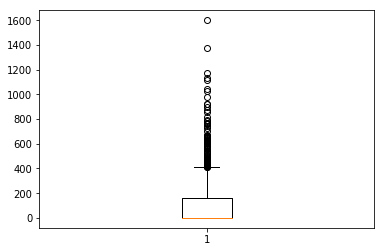

In [21]:
#Let's do the outliers analysis
#MasVnrArea outlier
plt.boxplot(housing_df.MasVnrArea)
Q1=housing_df.MasVnrArea.quantile(0.05)
Q3=housing_df.MasVnrArea.quantile(0.95)
IQR=Q3-Q1
housing_df=housing[(housing_df.MasVnrArea>=Q1)&(housing_df.MasVnrArea<=Q3)]
housing_df.shape


(1320, 74)

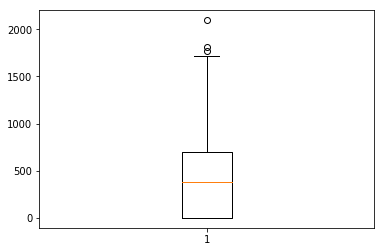

In [22]:
#Let's do the outliers analysis
#BsmtFinSF1 outlier
plt.boxplot(housing_df.BsmtFinSF1)
Q1=housing_df.BsmtFinSF1.quantile(0.05)
Q3=housing_df.BsmtFinSF1.quantile(0.95)
IQR=Q3-Q1
housing_df=housing_df[(housing_df.BsmtFinSF1>=Q1)&(housing_df.BsmtFinSF1<=Q3)]
housing_df.shape

(1255, 74)

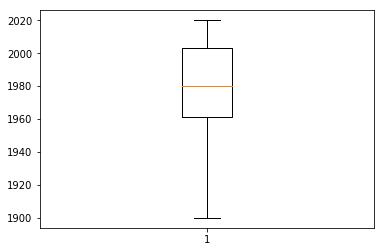

In [23]:
#GarageYrBlt outlier
plt.boxplot(housing_df.GarageYrBlt)
Q1=housing_df.GarageYrBlt.quantile(0.05)
Q3=housing_df.GarageYrBlt.quantile(0.95)
IQR=Q3-Q1
housing_df=housing_df[(housing.GarageYrBlt>=Q1)&(housing_df.GarageYrBlt<=Q3)]
housing_df.shape

(1130, 74)

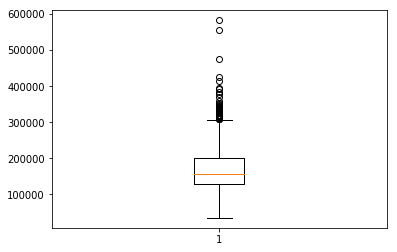

In [24]:
#SalePrice
plt.boxplot(housing_df.SalePrice)
Q1=housing_df.SalePrice.quantile(0.05)
Q3=housing_df.SalePrice.quantile(0.95)
IQR=Q3-Q1
housing_df=housing_df[(housing_df.SalePrice>=Q1)&(housing_df.SalePrice<=Q3)]
housing_df.shape

(1074, 74)

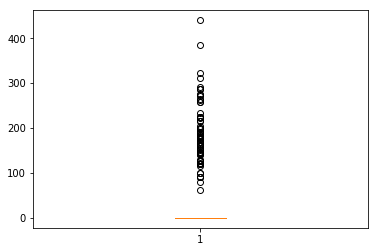

In [25]:
#ScreenPorch
plt.boxplot(housing_df.ScreenPorch)
Q1=housing_df.ScreenPorch.quantile(0.05)
Q3=housing_df.ScreenPorch.quantile(0.95)
IQR=Q3-Q1
housing_df=housing_df[(housing_df.ScreenPorch>=Q1)&(housing_df.ScreenPorch<=Q3)]
housing_df.shape

In [26]:
#Checking the Correlation between the variables
#correlation matrix
cor = housing.corr()
cor

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378


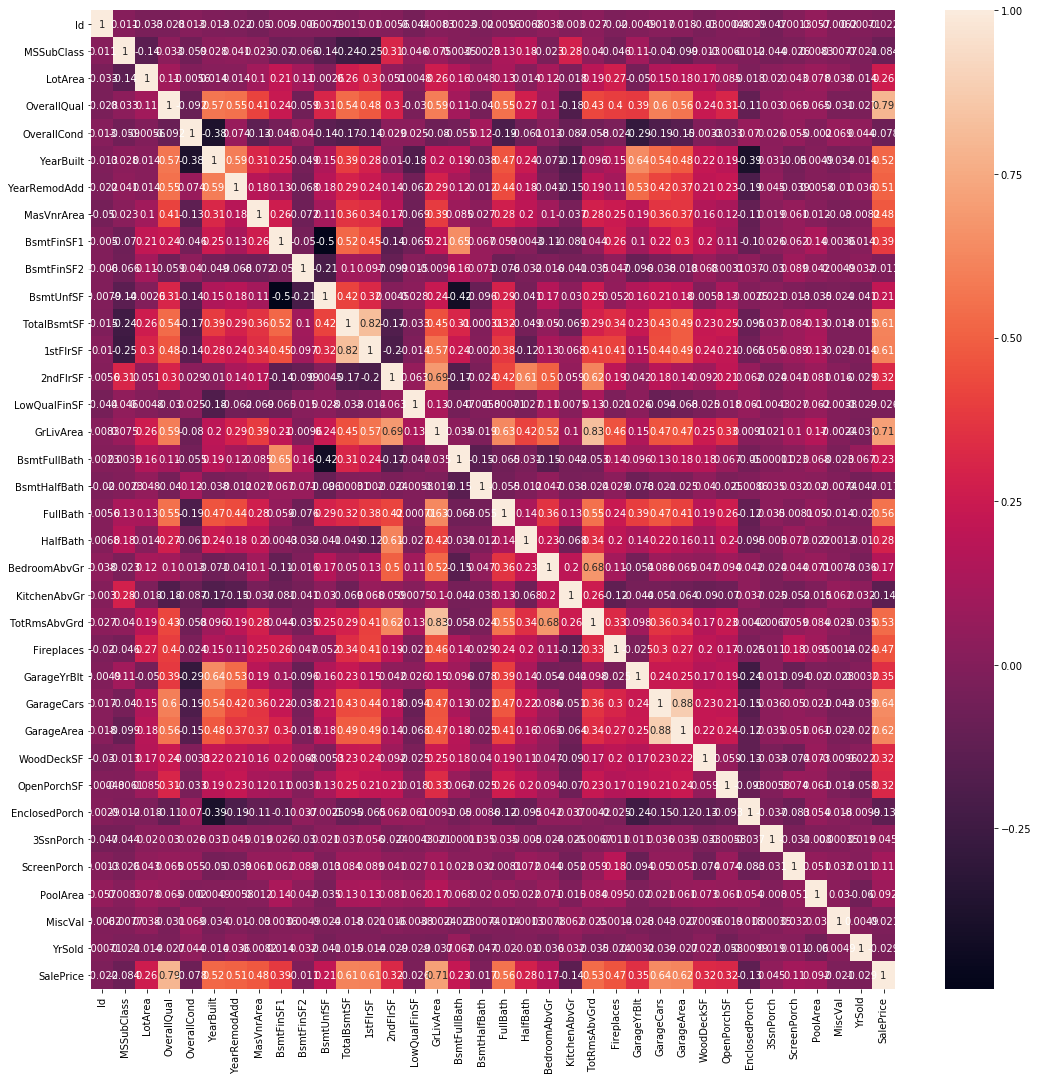

In [27]:
# figure size
plt.figure(figsize=(18,18))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

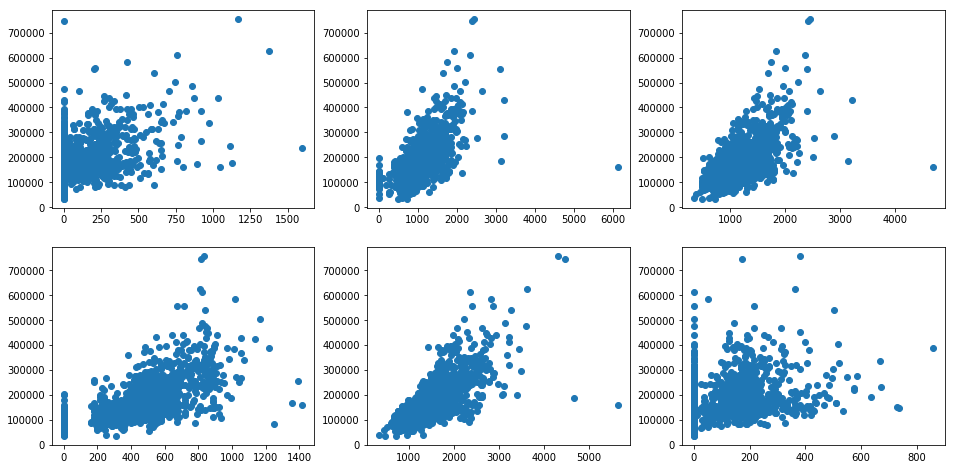

In [28]:


plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing.MasVnrArea,housing.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing.TotalBsmtSF,housing.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing['GarageArea'],housing.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing['GrLivArea'],housing.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)

## Data prepration

In [29]:
#Finding the continous variable for scaling
housing_price_num = housing.dtypes
housing_price_num = housing_price_num[(housing_price_num == 'int64') | (housing_price_num == float)]


In [30]:
#value counts
pd.DataFrame(housing_price_num).reset_index().set_index(0).reset_index()[0].value_counts()

int64      34
float64     2
Name: 0, dtype: int64

In [31]:
#numeric columns
print(housing_price_num)

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
SalePrice          int64
dtype: object


In [32]:
#Scaling the continous variable
scaler = StandardScaler()
housing[[ 'Id','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold', 'SalePrice']]= scaler.fit_transform(housing[[ 'Id','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',  'YrSold', 'SalePrice']])

housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,RL,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.216503,-0.359325,-0.116339,-0.270208,0,0,0.138777,WD,Normal,0.347273
1,-1.728492,-0.872563,RL,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.704483,-0.359325,-0.116339,-0.270208,0,0,-0.614439,WD,Normal,0.007288
2,-1.726120,0.073375,RL,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.070361,-0.359325,-0.116339,-0.270208,0,0,0.138777,WD,Normal,0.536154
3,-1.723747,0.309859,RL,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-0.176048,4.092524,-0.116339,-0.270208,0,0,-1.367655,WD,Abnorml,-0.515281
4,-1.721374,0.073375,RL,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.563760,-0.359325,-0.116339,-0.270208,0,0,0.138777,WD,Normal,0.869843


In [33]:
#Numeric Columns
print(housing_price_num)

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
SalePrice          int64
dtype: object


In [34]:
housing.shape

(1460, 74)

In [35]:
#finding object columns for dummy variable
housing_object = housing.select_dtypes('object')

In [36]:

#categorical columns

housing_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
# Create dummy variable with drop_first argument

dummy_var = pd.get_dummies(housing[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']], drop_first = True)

In [38]:
dummy_var.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
housing = pd.concat([housing, dummy_var], axis = 1)
housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,RL,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,-1.728492,-0.872563,RL,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,-1.726120,0.073375,RL,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,-1.723747,0.309859,RL,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,-1.721374,0.073375,RL,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [40]:
# Drop the original one

housing = housing.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1)

In [41]:
housing.shape

(1460, 232)

In [42]:
housing.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,0,1,0,0,0,1,0
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0,0,0,0,1,0,0,0,1,0
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,0,1,0,0,0,1,0
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,0,1,0,0,0,0,0
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,0,1,0,0,0,1,0


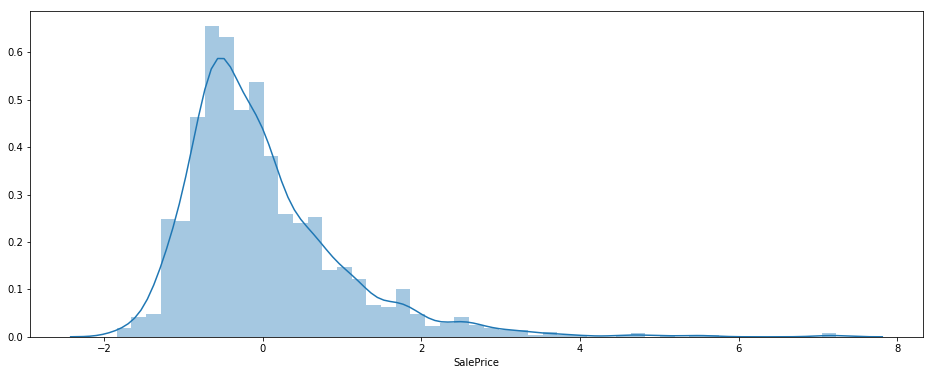

In [43]:

plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

## Data splitation train-test


In [44]:
# split into train and test
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

In [45]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [46]:
y_test = df_test.pop('SalePrice')
X_test = df_test

##  Model Building and Evaluation


Now using RFE lets try to to find the optimal number of feature

In [47]:

lr  = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=70, step=1, verbose=0)

In [48]:
#feature elimination using rfe
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']


In [49]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [50]:
# filter the train and test set for the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Ridge and Lasso Regression
Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression 

## Lasso

In [51]:
lr = Lasso(alpha=0.001)
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lr.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8556230438076655
0.8713495477354707


In [52]:
model_parameter = list(lr.coef_)
model_parameter.insert(0,lr.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Id', -0.123),
 ('MSSubClass', 0.244),
 ('LotArea', 0.048),
 ('OverallQual', 0.01),
 ('OverallCond', -0.036),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.082),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.021),
 ('BsmtFinSF2', 0.294),
 ('BsmtUnfSF', 0.31),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.196),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.268),
 ('GrLivArea', -0.0),
 ('BsmtFullBath', 0.279),
 ('BsmtHalfBath', -0.215),
 ('FullBath', -0.087),
 ('HalfBath', 0.592),
 ('BedroomAbvGr', 0.385),
 ('KitchenAbvGr', 0.46),
 ('TotRmsAbvGrd', 0.171),
 ('Fireplaces', 0.041),
 ('GarageYrBlt', -1.479),
 ('GarageCars', -0.219),
 ('GarageArea', -0.257),
 ('WoodDeckSF', -0.333),
 ('OpenPorchSF', -0.26),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.474),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.307),
 ('YrSold', 0.15),
 ('MSZoning_FV', 0.906),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.396),
 ('Lot

In [53]:
#let's find out optimal alpha using GridSearchCV
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [54]:

cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.281749,0.100257,0.017951,0.012320,0.001,{'alpha': 0.001},0.884790,0.920667,0.827808,0.857571,...,0.859774,0.855068,0.857641,0.890442,0.862783,0.865133,0.854963,0.851913,0.860359,0.010899
1,0.047073,0.009150,0.011769,0.001987,0.010,{'alpha': 0.01},0.862551,0.891329,0.834993,0.822598,...,0.790034,0.785170,0.787728,0.828600,0.796069,0.804831,0.781986,0.781865,0.792310,0.013945
2,0.041689,0.013594,0.014262,0.004209,0.100,{'alpha': 0.1},0.776942,0.813279,0.751510,0.721202,...,0.709880,0.709253,0.707372,0.761263,0.715611,0.732012,0.685267,0.702058,0.712970,0.019559
3,0.040293,0.009130,0.015758,0.004206,1.000,{'alpha': 1.0},-0.000056,-0.002887,-0.025191,-0.009947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.047374,0.020304,0.015160,0.001986,5.000,{'alpha': 5.0},-0.000056,-0.002887,-0.025191,-0.009947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


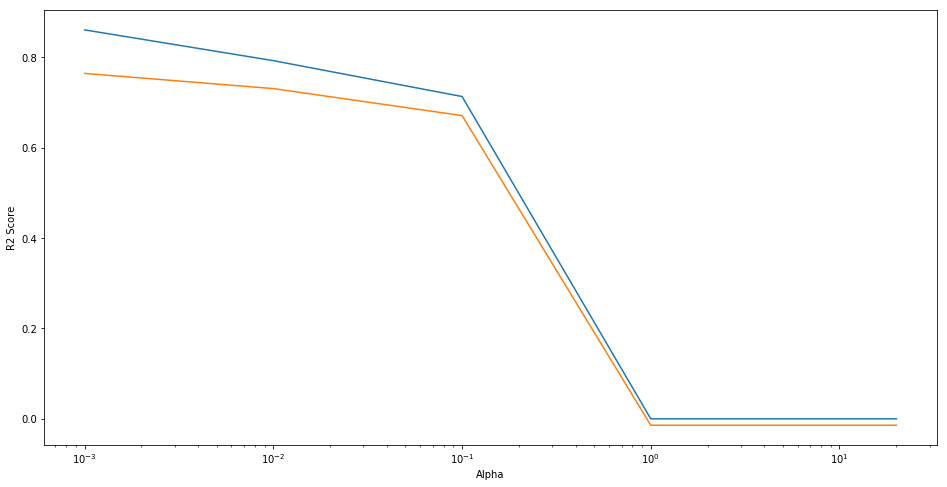

In [55]:

plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()


In [56]:

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [57]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8556230438076655
0.8713495477354707


As we see before using GridSearchCV and after our coefficient remain same

In [58]:

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [59]:
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
35,MSZoning_FV,0.906280
19,HalfBath,0.591644
30,3SsnPorch,0.473653
21,KitchenAbvGr,0.460450
41,LotShape_IR3,0.395635
20,BedroomAbvGr,0.385366
10,BsmtUnfSF,0.309612
33,MiscVal,0.306689
50,LotConfig_Inside,0.298646
9,BsmtFinSF2,0.294356


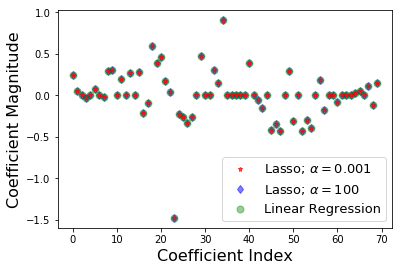

In [60]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.001$',zorder=7) # zorder for ordering the markers
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

## Ridge
 

In [61]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9025883017259225
0.7483836887192996


As above coefficient not showing good result it contain multicollinearity so we use GridSearchCV for better result

In [62]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [63]:

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.090059,0.086838,0.018152,0.011256,0.001,{'alpha': 0.001},0.811032,0.927388,-0.069165,0.870846,...,0.902949,0.904570,0.906276,0.902059,0.905751,0.915727,0.906952,0.900585,0.904729,0.004342
1,0.026232,0.006691,0.009174,0.002223,0.010,{'alpha': 0.01},0.823448,0.926841,0.049774,0.871471,...,0.902701,0.904211,0.905921,0.901993,0.905492,0.915348,0.906583,0.900231,0.904422,0.004313
2,0.032813,0.012325,0.011569,0.003433,0.100,{'alpha': 0.1},0.863081,0.923291,0.566520,0.870357,...,0.894171,0.893416,0.895321,0.900638,0.896748,0.903924,0.895180,0.889489,0.894987,0.004425
3,0.020445,0.006149,0.007878,0.001510,0.200,{'alpha': 0.2},0.870452,0.922062,0.715011,0.867856,...,0.886052,0.884396,0.886493,0.899676,0.888541,0.894399,0.885407,0.880480,0.886880,0.005783
4,0.021146,0.006224,0.007979,0.001611,0.500,{'alpha': 0.5},0.875026,0.922380,0.808323,0.863995,...,0.873687,0.871818,0.874160,0.897738,0.876009,0.881426,0.871047,0.867934,0.875223,0.008437


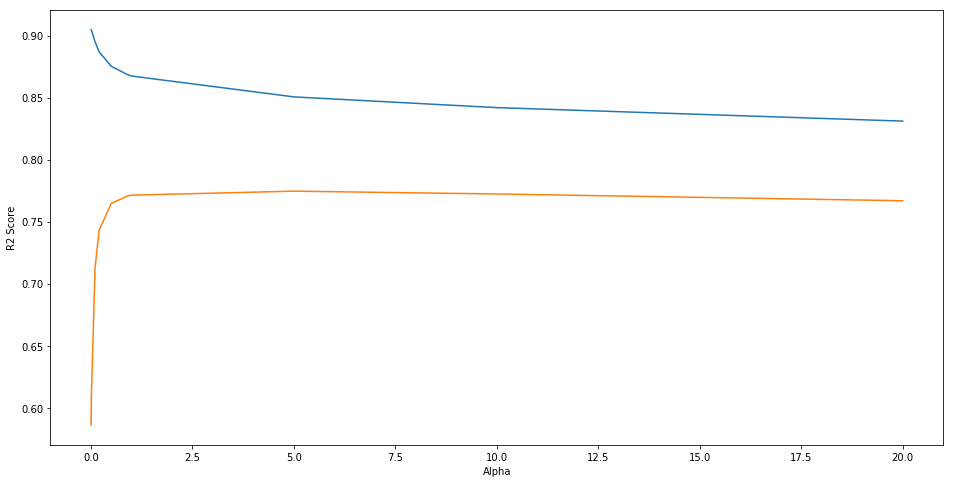

In [64]:

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()


In [65]:

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [66]:

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8726951801531225
0.8633380754036563


In [67]:


model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [68]:
ridge_coef.sort_values(by='Coef',ascending=False).head(15)

,Feaure,Coef
35,MSZoning_FV,1.903580
30,3SsnPorch,1.580527
33,MiscVal,1.495023
34,YrSold,1.292824
32,PoolArea,1.224436
31,ScreenPorch,0.829250
19,HalfBath,0.614046
41,LotShape_IR3,0.552650
10,BsmtUnfSF,0.528379
21,KitchenAbvGr,0.508312


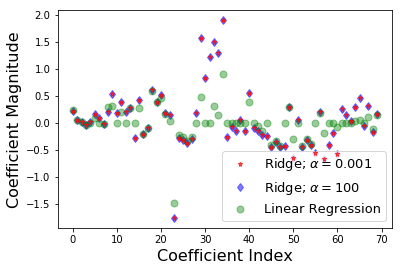

In [69]:
plt.plot(ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7) # zorder for ordering the markers
plt.plot(ridge.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

Let’s understand the figure above. In X axis we plot the coefficient index and coefficient magnitude. For low value of α (0.001), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 20,30,40 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

#### After completing the whole model we can see that lasso perform better as compare to rigid and we have some selective features that explaining dataset better.

### Featuere
these variables are significant in predicting the price of a house

##### MSZoning_RH : Identifies the general zoning classification of the sale

##### HalfBath: Half baths above grad

##### ScreenPorch:  Screen porch area in square fee

##### KitchenAbvGr: Kitchens above grade

##### YrSold: Year Sold (YYYY)



##### Best alpha value of lasso is: {'alpha:0.001'}
##### Best alpha vaue of rigid is: {'alpha:5.0'}
